## Stock Price Prediction Project

**Summary:** The objective of this project is to forecast the closing prices of stocks for companies listed on the New York Stock Exchange (NYSE) by leveraging historical data. The project consists of two main parts.

**Part 1: Predictive Modeling Using Different Approaches**
In the first part of the project, we will employ various predictive modeling techniques to estimate stock prices. Specifically, we will implement Linear Regression, Artificial Neural Networks (ANN), and Convolutional Neural Networks (CNN) on the provided dataset.

**Part 2: Time Series Analysis and Advanced Models**
Moving to the second part, we will transform the data into a time series format, enabling us to capture temporal patterns. We will then apply Long Short-Term Memory (LSTM), ANN, and CNN models to the time series data. A key focus will be on comparing the performance and accuracies of each of these models.

**Additional Points:**
1. **Data Preparation:** Before diving into modeling, meticulous data preprocessing will be carried out, including handling missing values, feature selection, and normalization to ensure the data is suitable for training the models.

2. **Linear Regression:** This classical regression technique will serve as a baseline. It models the linear relationship between features and stock prices and provides insights into the basic predictive power of the data.

3. **Artificial Neural Networks (ANN):** ANN is a versatile approach that can capture complex relationships within the data. It's expected to perform better than linear regression by learning intricate patterns in the data.

4. **Convolutional Neural Networks (CNN):** Although commonly used for image data, CNNs can be adapted to sequential data. In this case, they might capture spatial dependencies within stock data.

5. **Time Series Transformation:** Converting the data into a time series format allows us to harness temporal patterns and trends that can significantly impact stock prices.

6. **Long Short-Term Memory (LSTM):** As a specialized model for sequence prediction, LSTM is particularly effective for time series data due to its ability to remember past information.

7. **Model Comparison:** By comparing the performances of different models, we can identify which approaches are most suitable for the stock price prediction task. This comparison will consider factors such as accuracy, precision, and robustness to market fluctuations.

8. **Evaluation Metrics:** A range of evaluation metrics, including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and possibly others, will be used to quantify the accuracy of the models' predictions.

9. **Implications:** Accurate stock price prediction has numerous practical implications, including aiding investors in making informed decisions, assisting financial analysts, and potentially contributing to the development of algorithmic trading strategies.

10. **Challenges:** Stock prices are influenced by a multitude of factors, including market sentiment, news events, and economic indicators. While historical price data is valuable, it might not capture all relevant variables, posing a challenge to the prediction task.

In conclusion, this project aims to combine traditional and advanced predictive techniques to forecast stock prices. By comparing these approaches and evaluating their performance on time series data, we can provide insights into which methods hold the most promise for accurate stock price predictions.

In [1]:
#Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset
#the dataset contains all 
data = pd.read_csv("prices-split-adjusted.csv")
df = pd.DataFrame(data)

In [3]:
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [4]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


### Data Information

In [5]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [6]:
# showing column wise %ge of NaN values they contains 

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)


date 	-	 0.0
symbol 	-	 0.0
open 	-	 0.0
close 	-	 0.0
low 	-	 0.0
high 	-	 0.0
volume 	-	 0.0


There are no null values

<AxesSubplot:>

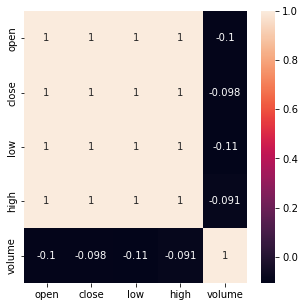

In [7]:
df = df[df['symbol']=='AAP']   # Choosin stock values for any company 

cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [8]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df


In [9]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.999382
close,1.000000
low,0.999615
high,0.999737


 Looks like all colums except volume are highly co-related for predecting close value. Using them for predictions.

In [10]:
df = df[top_corelated_values.index]
df.head()

,open,close,low,high
253,40.700001,40.380001,40.360001,41.040001
720,40.299999,40.139999,39.720001,40.310001
1188,40.049999,40.490002,40.049999,40.779999
1656,39.549999,40.480000,39.549999,40.540001
2124,40.250000,40.639999,40.110001,40.820000


In [11]:
df.shape

(1762, 4)

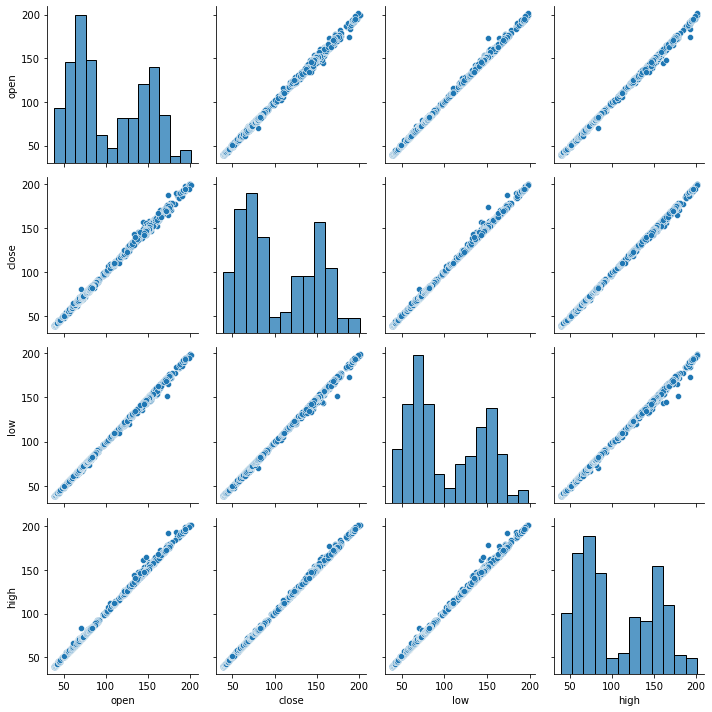

In [12]:
sns.pairplot(df)
plt.tight_layout()

Since other parameters have linear relationship with __close__, we are using some linear models fore prediction

In [13]:
X = df.drop(['close'], axis=1)
y = df['close']

 Since range of data in different columns veries significantly we need to scale the independent variable i.e. X. For this we will use Min-Max Scaling.

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.012001,0.012392,0.010256
1,0.009539,0.008387,0.005746
2,0.008000,0.010452,0.008649
3,0.004923,0.007323,0.007167
4,0.009231,0.010827,0.008897


## Prediction Model

In [15]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

### 1. Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [17]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
675111,173.660004,173.682489
675608,171.919998,172.593759
676105,172.000000,171.182789
676602,187.789993,187.980305
677099,187.029999,188.440838


In [18]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9931342019332019


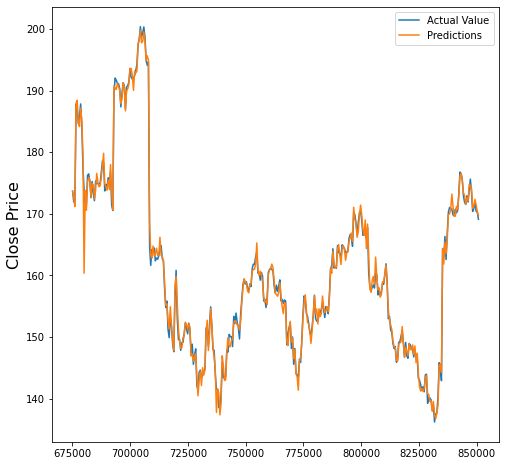

In [19]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

### 2. ANN

In [20]:
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [21]:
# Model Training

model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

Epoch 1/70
36/36 [==============================] - 1s 8ms/step - loss: 6058.4521 - val_loss: 22089.2305
Epoch 2/70
36/36 [==============================] - 0s 3ms/step - loss: 6048.5220 - val_loss: 22049.2559
Epoch 3/70
36/36 [==============================] - 0s 2ms/step - loss: 6015.8032 - val_loss: 21870.7129
Epoch 4/70
36/36 [==============================] - 0s 2ms/step - loss: 5892.5981 - val_loss: 21187.8770
Epoch 5/70
36/36 [==============================] - 0s 2ms/step - loss: 5517.4351 - val_loss: 19324.2422
Epoch 6/70
36/36 [==============================] - 0s 2ms/step - loss: 4687.3774 - val_loss: 15608.8916
Epoch 7/70
36/36 [==============================] - 0s 2ms/step - loss: 3290.7878 - val_loss: 10049.8447
Epoch 8/70
36/36 [==============================] - 0s 2ms/step - loss: 1626.5961 - val_loss: 4346.4404
Epoch 9/70
36/36 [==============================] - 0s 2ms/step - loss: 428.6574 - val_loss: 1112.7540
Epoch 10/70
36/36 [==============================] - 0s 2m

In [22]:
# Prediction

y_pred_2 = model_2.predict(X_test)

12/12 [==============================] - 0s 944us/step


In [23]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,174.024048
675608,171.919998,172.337067
676105,172.000000,170.551971
676602,187.789993,179.276138
677099,187.029999,188.062637


In [24]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9873679482970171


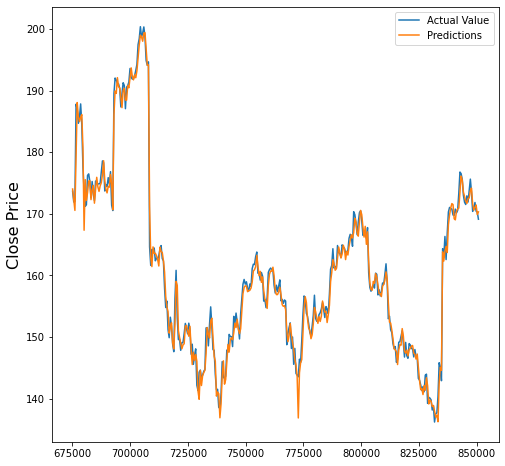

In [25]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

### 3. CNN

In [26]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [27]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [28]:
# Model Training

model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 1s 7ms/step - loss: 5561.1206 - val_loss: 11801.1758
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 529.4139 - val_loss: 267.3263
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 19.8745 - val_loss: 48.8341
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 6.4854 - val_loss: 44.4527
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 2.5651 - val_loss: 8.7266
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 1.0619 - val_loss: 4.1108
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 0.5880 - val_loss: 2.4675
Epoch 8/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4749 - val_loss: 1.6757
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4442 - val_loss: 1.6706
Epoch 10/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4298 - val_loss: 1.

In [29]:
# Prediction

y_pred_3 = model_3.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [30]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,176.840881
675608,171.919998,175.187958
676105,172.000000,173.359985
676602,187.789993,182.531067
677099,187.029999,191.238220


In [31]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9653602725212506


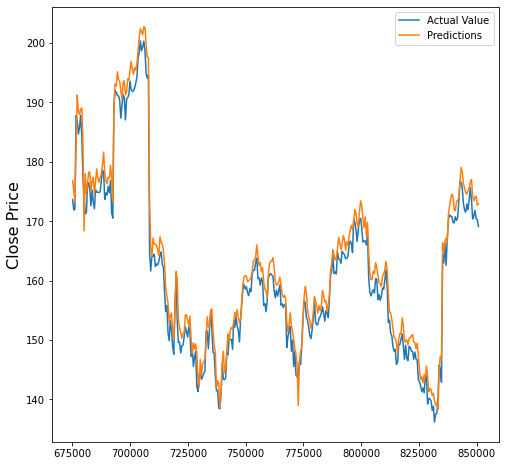

In [32]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

#### Comparision of Accuracies of different models

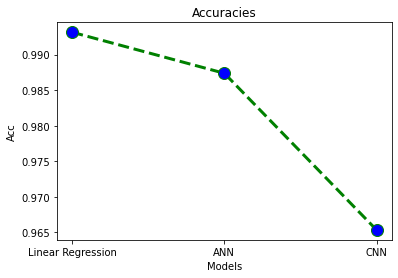

In [33]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()

**********************

### Now converting data in a time series data and applying some more models.

In [34]:
close = df.reset_index()['close']
close.head()

0    40.380001
1    40.139999
2    40.490002
3    40.480000
4    40.639999
Name: close, dtype: float64

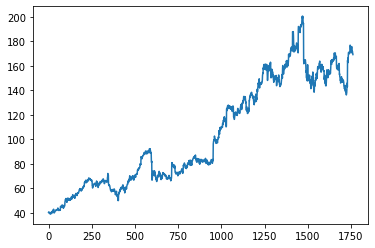

In [35]:
plt.plot(close)
plt.show()

In [36]:
time_step = 30
X, y = [], []

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [37]:
X[:5]

array([[40.380001, 40.139999, 40.490002, 40.48    , 40.639999, 40.240002,
        39.540001, 40.09    , 39.560001, 39.310001, 39.5     , 39.16    ,
        39.23    , 39.740002, 40.5     , 40.549999, 40.59    , 39.77    ,
        39.450001, 40.490002, 41.189999, 41.189999, 40.93    , 40.720001,
        40.810001, 41.57    , 42.330002, 42.549999, 42.810001, 42.630001],
       [40.139999, 40.490002, 40.48    , 40.639999, 40.240002, 39.540001,
        40.09    , 39.560001, 39.310001, 39.5     , 39.16    , 39.23    ,
        39.740002, 40.5     , 40.549999, 40.59    , 39.77    , 39.450001,
        40.490002, 41.189999, 41.189999, 40.93    , 40.720001, 40.810001,
        41.57    , 42.330002, 42.549999, 42.810001, 42.630001, 42.880001],
       [40.490002, 40.48    , 40.639999, 40.240002, 39.540001, 40.09    ,
        39.560001, 39.310001, 39.5     , 39.16    , 39.23    , 39.740002,
        40.5     , 40.549999, 40.59    , 39.77    , 39.450001, 40.490002,
        41.189999, 41.189999, 40.93 

In [38]:
y[:5]

array([42.880001, 40.150002, 40.      , 40.240002, 40.220001])

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.007567,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,...,0.007420,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399
1,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,...,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957
2,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,...,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935
3,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,...,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000
4,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,0.003598,...,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000,0.001496


## Prediction

In [40]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

### 1. LSTM

In [41]:
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [42]:
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()
    
    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [43]:
# Model Training

model_1 = reg()
model_1.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 1s 18ms/step - loss: 2779.4141 - val_loss: 201.4219
Epoch 2/100
35/35 [==============================] - 0s 12ms/step - loss: 64.3523 - val_loss: 58.9189
Epoch 3/100
35/35 [==============================] - 0s 12ms/step - loss: 18.2494 - val_loss: 49.4654
Epoch 4/100
35/35 [==============================] - 0s 11ms/step - loss: 15.9036 - val_loss: 63.6280
Epoch 5/100
35/35 [==============================] - 0s 12ms/step - loss: 15.3016 - val_loss: 42.5095
Epoch 6/100
35/35 [==============================] - 0s 12ms/step - loss: 15.3766 - val_loss: 56.8021
Epoch 7/100
35/35 [==============================] - 0s 12ms/step - loss: 15.0060 - val_loss: 55.4860
Epoch 8/100
35/35 [==============================] - 0s 10ms/step - loss: 14.7613 - val_loss: 40.0525
Epoch 9/100
35/35 [==============================] - 0s 10ms/step - loss: 14.7220 - val_loss: 63.0087
Epoch 10/100
35/35 [==============================] - 0s 10ms/step - loss: 14.2

In [44]:
# Prediction

y_pred_1 = model_1.predict(X_test_)

11/11 [==============================] - 0s 3ms/step


In [45]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,188.467621
1,185.770004,187.507019
2,187.839996,187.619370
3,184.449997,189.929626
4,177.539993,189.530518


In [46]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.870757199339359


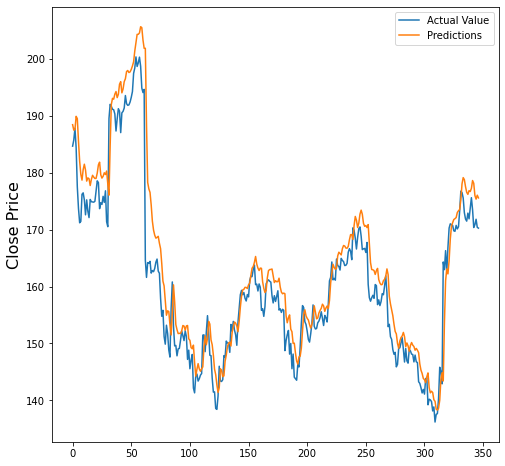

In [47]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

### 2. ANN

In [48]:
# Model Training

model_2 = regressor(inp_dim=30)
model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 1s 5ms/step - loss: 6283.3599 - val_loss: 22401.5293
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 6251.7144 - val_loss: 22084.6211
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 6053.1084 - val_loss: 20208.0352
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 5234.1567 - val_loss: 14060.8633
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 3288.7092 - val_loss: 3870.0212
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 979.7520 - val_loss: 333.6362
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 246.3526 - val_loss: 1725.2845
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 222.0630 - val_loss: 1437.1005
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 213.9253 - val_loss: 1459.4307
Epoch 10/100
35/35 [==============================] - 0s

In [49]:
# Prediction

y_pred_2 = model_2.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [50]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.7886955421433262


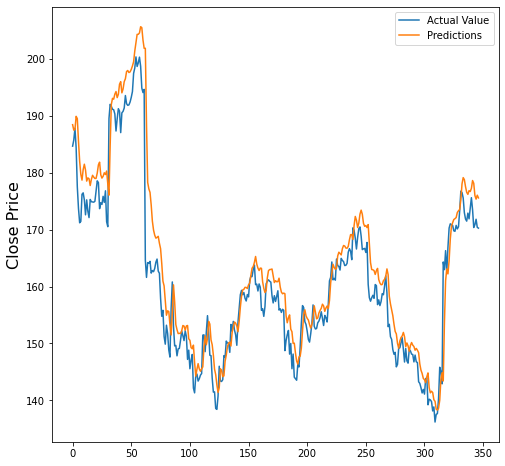

In [51]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

### 3. CNN

In [52]:
# Model Training

model_3 = reg()
model_3.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 1s 14ms/step - loss: 4541.0635 - val_loss: 3883.3606
Epoch 2/100
35/35 [==============================] - 0s 9ms/step - loss: 161.6218 - val_loss: 50.4185
Epoch 3/100
35/35 [==============================] - 0s 9ms/step - loss: 21.9443 - val_loss: 87.4965
Epoch 4/100
35/35 [==============================] - 0s 8ms/step - loss: 15.9285 - val_loss: 41.5095
Epoch 5/100
35/35 [==============================] - 0s 10ms/step - loss: 15.3634 - val_loss: 53.2886
Epoch 6/100
35/35 [==============================] - 0s 10ms/step - loss: 15.8658 - val_loss: 36.2704
Epoch 7/100
35/35 [==============================] - 0s 10ms/step - loss: 14.9654 - val_loss: 34.6329
Epoch 8/100
35/35 [==============================] - 0s 10ms/step - loss: 14.5910 - val_loss: 32.4689
Epoch 9/100
35/35 [==============================] - 0s 11ms/step - loss: 14.8559 - val_loss: 32.5917
Epoch 10/100
35/35 [==============================] - 0s 9ms/step - loss: 14.601

In [53]:
# Prediction

y_pred_3 = model_3.predict(X_test_)

11/11 [==============================] - 0s 4ms/step


In [54]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,185.835876
1,185.770004,187.574844
2,187.839996,188.759064
3,184.449997,190.222656
4,177.539993,190.417099


In [55]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.8554728695694583


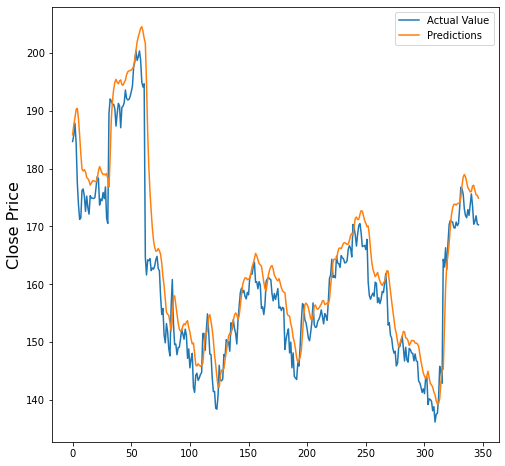

In [56]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

### Comparision of Accuracies of different models

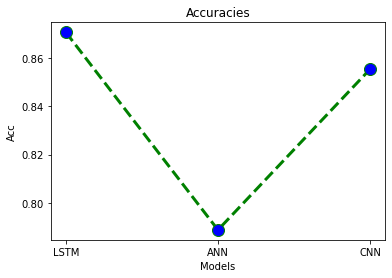

In [57]:

plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'ANN', 'CNN'])
plt.show()